The dataset appears to contain Twitter data, with columns representing:

     ID (possibly): Contains numerical values.
     Topic or Category: Indicates a topic, in this case, possibly "Borderlands."
     Sentiment Label: Contains sentiment labels such as "Positive","Negative","Neutral","Irrelevant"
     Tweet Text: Contains the actual text of tweets (e.g., "im getting on borderlands and i will murder you all ,").

Given the structure, this dataset seems suitable for a sentiment analysis project using a Recurrent Neural Network (RNN). The goal could be to classify tweets based on sentiment (e.g., positive, negative, neutral) using the tweet text as input. RNNs, which are well-suited for handling sequential data like text, can capture the context within tweets to make predictions on sentiment labels.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import seaborn as sns

In [2]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [4]:
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Category', 'Sentiment', 'Tweet']

In [5]:
df.head()

,ID,Category,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.tail()

,ID,Category,Sentiment,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
df.size

298728

In [8]:
df.shape

(74682, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Category   74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [11]:
df.drop(['ID','Category'], axis =1, inplace=True)

For this Model "ID" & "Category" is no need, there for deleting this for the dataset

In [13]:
df.head()

,Sentiment,Tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
df.isnull().sum()

Sentiment      0
Tweet        686
dtype: int64

In [15]:
df.dropna(subset=['Sentiment', 'Tweet'], inplace=True)

In [16]:
df.isnull().sum()

Sentiment    0
Tweet        0
dtype: int64

In [17]:
df.shape

(73996, 2)

In [18]:
df.columns

Index(['Sentiment', 'Tweet'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

l1=le.fit(df['Sentiment'])
df['Sentiment']=l1.transform(df['Sentiment'])

In [20]:
x = df['Tweet']
y = df['Sentiment']

In [21]:
x

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Tweet, Length: 73996, dtype: object

In [22]:
y

0        3
1        3
2        3
3        3
4        3
        ..
74677    3
74678    3
74679    3
74680    3
74681    3
Name: Sentiment, Length: 73996, dtype: int32

In [23]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)
print(y)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [24]:
# splitting for training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=4)

In [25]:
xtrain

5684     "Amazon is a big abomination to a business tha...
62129                                                 with
52424       Of course, feel the beauty of the landscape...
5636     @ ThelazyUS12 Thanks for entering Grand Summon...
27995    [PS4] | Clapping Cheeks & Solid Ws | Positive ...
                               ...                        
74258                                            Big shit.
65865    Johnson & Johnson ain’t doing well. They stopp...
23563    Co-star accuses Google of 'anti-astrological b...
12011           Jimmy Butler makin this shit look in NBA2K
74588    Heard people are hands with order their Nvidia...
Name: Tweet, Length: 59196, dtype: object

In [26]:
xtest

62418    Please for the love of God stop spreading the ...
33901    @ fortnite must have forgotten the console whe...
45858    Aye Verizon be coming thru wit this promise to...
66836    for FUCKS SAKE!!!!!!! A MONTH JUST ONE MONTH W...
8079     Imagine complaining wanting "realistic body pr...
                               ...                        
13433    Justice is the face of game of 2019-2020. No d...
6531     for little armys who just joined TF fandom, we...
4231     It is not the first time that the EU Commissio...
37449    FARMINGTON-NEW LISTING AT 17 HEARTHSTONE LANE ...
25421         Capitalist ""democracy"" back at it quickly.
Name: Tweet, Length: 14800, dtype: object

In [27]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [28]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [29]:
def norm(data):
    stop=set(stopwords.words('english'))
    cleaned=[]
    for i in data:

        #lowercasing
        i=i.lower()    

        #here url is not relevenant so repacing urls with whitespaces
        i=re.sub('https?://\\S+|www\\.\\S+','',i)

        #replaces any non-word character(digits,underscore etc) with a space
        i=re.sub('\\W',' ',i)

        #removes newline characters if there are any.
        i=re.sub('\n','',i)

        #replaces multiple spaces with a single space
        i=re.sub(' +',' ',i)
        
        #remove leading and trailing spaces.
        i=re.sub('^ ','',i)
        i=re.sub(' $','',i)
        
        #removing stopwords
        i = ' '.join([word for word in i.split() if word not in stop])

        cleaned.append(i)

    return cleaned

xtrain=norm(xtrain)
xtest=norm(xtest)    

In [30]:
xtrain

['amazon big abomination business huge entirely positive impact environment world treatment staff raises big questions gu com p dabz5 stw',
 '',
 'course feel beauty landscape',
 'thelazyus12 thanks entering grand summoners watch video see 100 amazon gift card retweet every day another chance win play gs global free 5 one punch man unit https frg8jyhqwe',
 'ps4 clapping cheeks solid ws positive vibes chat club 0',
 'jennifer bean hand reactive makes kurt hulk wrap possible copyright vk2m8oowne0',
 'unk',
 'blizzard patch notes say preorder 5th bundles pulled mobile sites blizzard predictions load',
 'valve fucking change anything dota 2 perfectly fine ruined fucking terrible',
 'world warcraft shadow lands delayed end year ift tt 2srzroz',
 'try hard take care skin still bad acne believe going spend valentine day insecure cheerful obviously alone sad enough pic facebook com cv4rci8aua',
 'minnie red unlocked 1 achievement battlefieldtm v increased difficulty 60 225 game 7325 total',
 '

In [31]:
max_vocab=10000
token=Tokenizer(num_words=max_vocab)
token.fit_on_texts(xtrain)

In [62]:
#convert text data (xtrain and xtest) into sequences of integers.

xtrain=token.texts_to_sequences(xtrain)
xtest=token.texts_to_sequences(xtest)

In [64]:
xtrain

[[26,
  130,
  310,
  332,
  2594,
  1697,
  2208,
  1610,
  71,
  2644,
  1405,
  4207,
  130,
  1506,
  8744,
  1,
  329,
  8745,
  8746],
 [],
 [972, 201, 2962, 5621],
 [81,
  1044,
  363,
  915,
  83,
  74,
  18,
  149,
  26,
  590,
  227,
  676,
  86,
  61,
  122,
  296,
  144,
  10,
  1149,
  577,
  143,
  46,
  8,
  1611,
  108,
  760,
  198],
 [291, 7469, 1882, 3531, 1697, 1422, 724, 1070, 299],
 [5976, 8096, 922, 5977, 217, 6359, 5305, 720, 4034, 8747],
 [14],
 [518, 439, 1970, 115, 2084, 2480, 7470, 2429, 225, 2209, 518, 6892, 869],
 [962, 33, 368, 260, 199, 4, 1723, 826, 1423, 33, 395],
 [71, 131, 2430, 4208, 591, 271, 80, 435, 326],
 [249,
  241,
  163,
  179,
  371,
  22,
  69,
  521,
  48,
  634,
  5306,
  61,
  6893,
  1060,
  656,
  320,
  323,
  5,
  23,
  1],
 [8748, 47, 2431, 24, 529, 95, 2595, 2248, 900, 6360, 2, 967],
 [430,
  21,
  657,
  171,
  2,
  67,
  1384,
  1582,
  128,
  50,
  62,
  17,
  6894,
  2645,
  314,
  47,
  611,
  37,
  1100,
  82,
  4,
  267,
  

In [66]:
#to ensure they all have the same length. therfore padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

xtrain=tf.keras.preprocessing.sequence.pad_sequences(xtrain,padding='post',maxlen=256)
xtest=tf.keras.preprocessing.sequence.pad_sequences(xtest,padding='post',maxlen=256)

In [68]:
xtrain

array([[  26,  130,  310, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [ 972,  201, 2962, ...,    0,    0,    0],
       ...,
       [ 138,  699, 3684, ...,    0,    0,    0],
       [7346, 9787,   20, ...,    0,    0,    0],
       [ 757,   19,  986, ...,    0,    0,    0]])

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128,input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # Updated output layer
])

C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [72]:
model.build(input_shape=(None, 100))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 32)                  │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,399,748 (5.34 MB)

 Trainable params: 1,399,748 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [76]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=5, validation_split=0.1, batch_size=30, shuffle=True)

Epoch 1/5
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 516s 284ms/step - accuracy: 0.5273 - loss: 1.0973 - val_accuracy: 0.7628 - val_loss: 0.6435
Epoch 2/5
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 467s 263ms/step - accuracy: 0.8150 - loss: 0.5213 - val_accuracy: 0.8078 - val_loss: 0.5147
Epoch 3/5
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 472s 266ms/step - accuracy: 0.8688 - loss: 0.3579 - val_accuracy: 0.8258 - val_loss: 0.5030
Epoch 4/5
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 448s 252ms/step - accuracy: 0.8960 - loss: 0.2785 - val_accuracy: 0.8417 - val_loss: 0.4874
Epoch 5/5
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 448s 252ms/step - accuracy: 0.9165 - loss: 0.2168 - val_accuracy: 0.8443 - val_loss: 0.5252


In [78]:
model.evaluate(xtest,ytest)

463/463 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.8429 - loss: 0.5227


[0.5333577394485474, 0.8400675654411316]

In [79]:
testloss,test_acc=model.evaluate(xtest,ytest)
print(f'test accuracy:{test_acc:4f}')

463/463 ━━━━━━━━━━━━━━━━━━━━ 38s 83ms/step - accuracy: 0.8429 - loss: 0.5227
test accuracy:0.840068


In [82]:
print(f'testloss: {testloss:4f}')

testloss: 0.533358


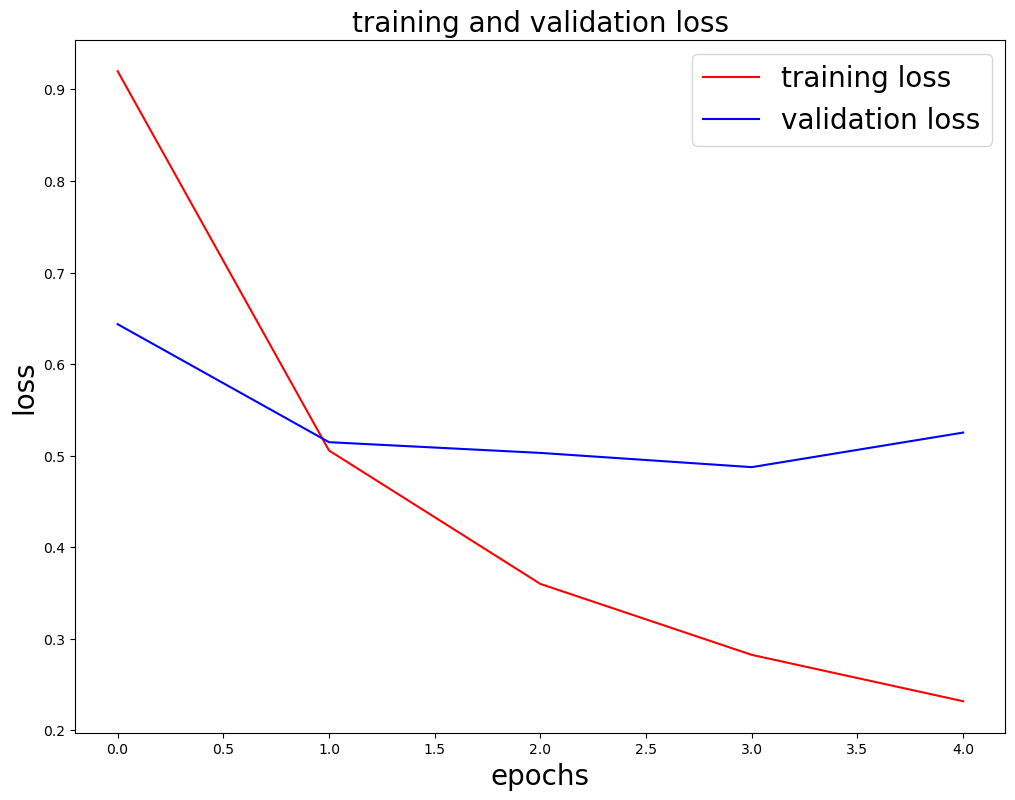

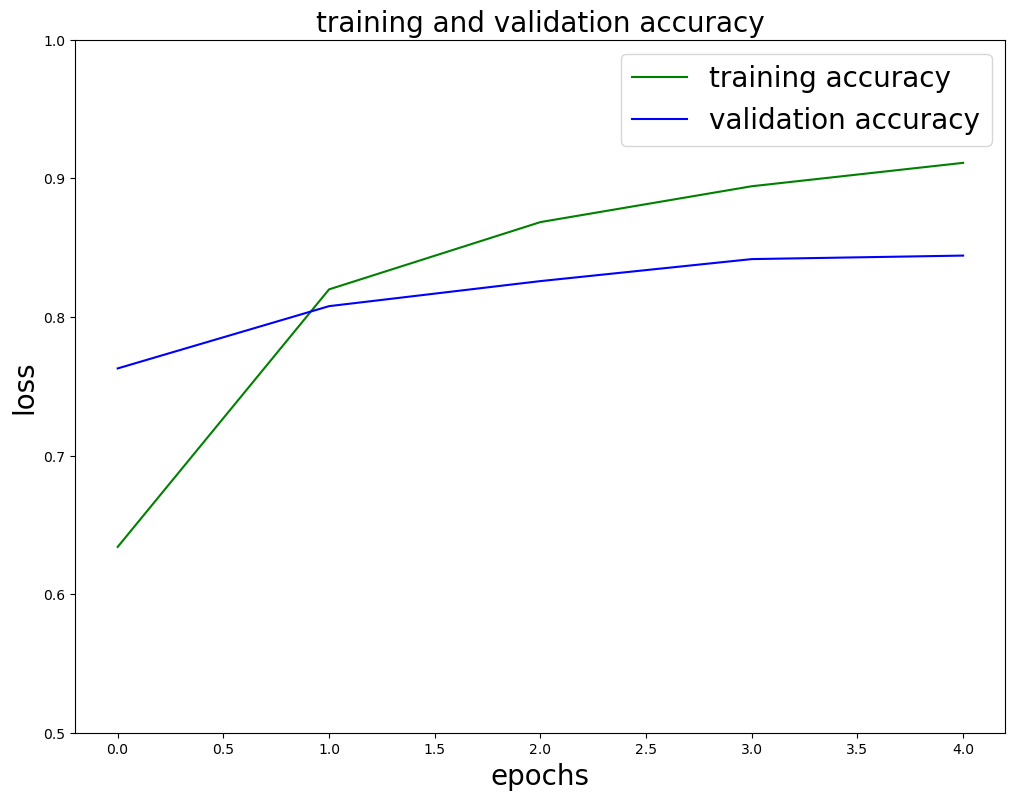

In [84]:

history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss',size=20)
plt.xlabel('epochs',size=20)
plt.ylabel('loss',size=20)
plt.legend(prop={'size':20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'g',label='training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy',size=20)
plt.xlabel('epochs',size=20)
plt.ylabel('loss',size=20)
plt.legend(prop={'size':20})
plt.ylim(0.5,1)
plt.show()

In [85]:
ytest

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [86]:
xtest

array([[  41,   12,  207, ...,    0,    0,    0],
       [ 113,  457, 2299, ...,    0,    0,    0],
       [3022,   40,  280, ...,    0,    0,    0],
       ...,
       [  51,   15,  490, ...,    0,    0,    0],
       [  11, 4155,  903, ...,    0,    0,    0],
       [5847, 4747,   43, ...,    0,    0,    0]])

In [90]:
# model.save('Tweet.h5')

In [92]:
prediction = model.predict(xtest)

predictions =[]

for i in prediction:
    # Get the index of the highest probability in each prediction (assuming a softmax output)
    category = np.argmax(i)
    predictions.append(category)


463/463 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step


In [94]:
predictions

[0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 3,
 0,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 3,
 2,
 1,
 1,
 0,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 3,
 0,
 3,
 0,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 0,
 2,
 3,
 0,
 3,
 1,
 2,
 0,
 3,
 1,
 3,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 1,
 3,
 3,
 0,
 3,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 2,
 0,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 3,
 1,
 2,
 3,
 0,
 0,
 0,
 2,
 1,
 3,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 0,
 1,
 0,
 3,
 3,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 1,


In [96]:
import numpy as np
ytest_single_label = np.argmax(ytest, axis=1)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy on testing set:', accuracy_score(ytest_single_label, predictions))
print('Precision on testing set:', precision_score(ytest_single_label, predictions, average='macro'))
print('Recall on testing set:', recall_score(ytest_single_label, predictions, average='macro'))


Accuracy on testing set: 0.8400675675675676
Precision on testing set: 0.8417982631640696
Recall on testing set: 0.8342578622983272


In [113]:
predicts = 'thehoaxhotel got scam phone call johnson johnson claiming also testing coronavirus replacement vaccine'

In [117]:
predicts = norm(predicts)

In [119]:
predicts = token.texts_to_sequences([predicts])

In [123]:
predicts=tf.keras.preprocessing.sequence.pad_sequences(predicts,padding='post',maxlen=256)

In [125]:
print(predicts)

[[  0   0   0 ...   0   0   0]
 [875   0   0 ...   0   0   0]
 [272   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [407   0   0 ...   0   0   0]
 [272   0   0 ...   0   0   0]]


In [127]:
pred=model.predict(predicts)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [129]:
pred

array([[0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.0622791 , 0.2814096 , 0.06065903, 0.5956523 ],
       [0.05792084, 0.30699256, 0.51294625, 0.12214039],
       [0.0622791 , 0.2814096 , 0.06065903, 0.5956523 ],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.12605356, 0.35128787, 0.27095965, 0.251699  ],
       [0.0622791 , 0.2814096 , 0.06065903, 0.5956523 ],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.05792084, 0.30699256, 0.51294625, 0.12214039],
       [0.29136762, 0.43812943, 0.14359066, 0.12691225],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.10009778, 0.32452044, 0.07995225, 0.4954295 ],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.1590017 , 0.2876485 , 0.30190217, 0.25144765],
       [0.1590017 , 0.2876485 ,

In [102]:
import numpy as np

# Assuming `pred` is the output of model.predict(xtest)
# Each row in `pred` contains probabilities for the six categories

multi_class_predictions = np.argmax(pred, axis=1)

In [104]:
multi_class_predictions

array([2], dtype=int64)